In [1]:
from plotting_rho import *
from bayesian import *

### 1. Convex Function in 1D

In [2]:
# Example
b = np.random.normal(0, 5, 100)
a = np.random.normal(0, 2, 100)
opt_alpha = bayesian_optimization(method = 'samples', a = a, b = b, p =50, max_eval = 100, as_dict = False)[1]

100%|██████████| 100/100 [00:08<00:00, 12.13trial/s, best loss: 1.4042169798130564]


In [3]:
rho_hist, rho_samples = get_opt_rho_1D(opt_alpha, 1000)

#### 1.1 Plotting Derivative

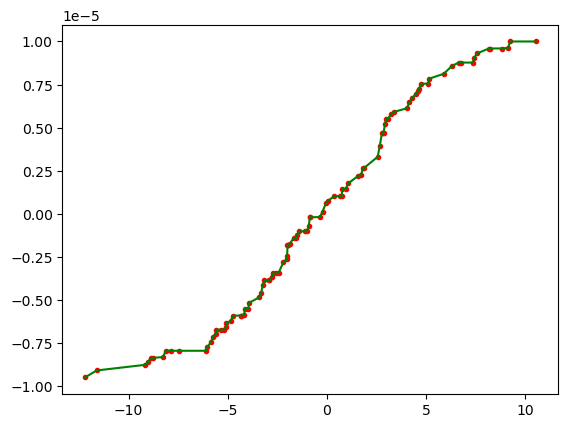

In [4]:
f = int_function(b,rho_samples,plot=True)

#### 1.2 Plotting Convex Function

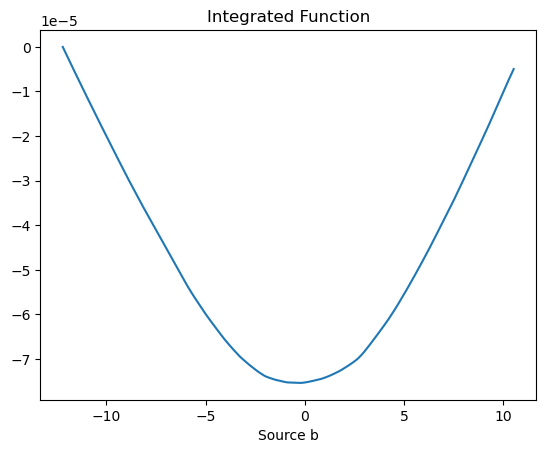

In [5]:
plot_int_function_smooth(b,rho_samples)

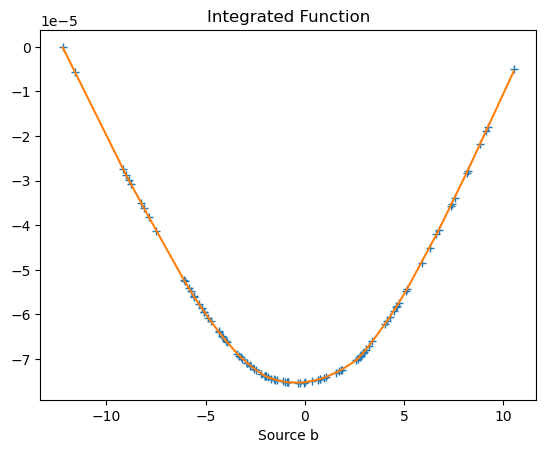

In [6]:
plot_int_function_lowess(b,rho_samples)

### 2. Convex Function in 2D

In [7]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100

# source_b samples
mu_b = np.array([0, 0])
cov_b = np.array([[1, 0], [0, 1]])
b_samples = ot.datasets.make_2D_samples_gauss(size_b, mu_b, cov_b)
mu_a = np.array([0, 0])
cov_a = np.array([[1,1], [1, 1]])
a_samples = ot.datasets.make_2D_samples_gauss(size_a, mu_a, cov_a)

a = np.array(a_samples).reshape(100,2)
b = np.array(b_samples).reshape(100,2)

result = bayesian_optimization('samples', a, b, a_grid = np.arange(100, dtype=np.float64), b_grid = np.arange(100, dtype=np.float64), plot = False, p=50, target_size = 100, lbd = 1, ubd = 101, algo = tpe.suggest, max_eval = 100, as_dict = False)
opt_alpha = result[1]

100%|██████████| 100/100 [05:10<00:00,  3.11s/trial, best loss: 0.2416547646849404]


In [9]:
rho_hist, rho_samples = get_opt_rho_multiD(opt_alpha,2,100)

#### 2.1 Plotting Derivatives

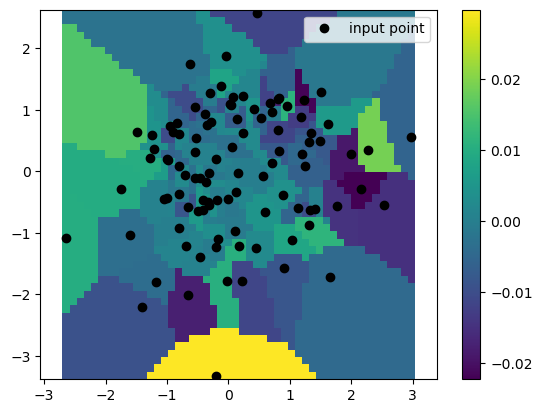

In [10]:
plot_2D_integrad(b, rho_samples, method = "Nearest")

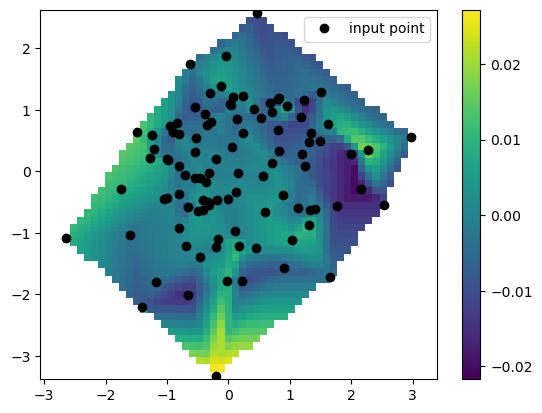

In [11]:
plot_2D_integrad(b, rho_samples, method = "Linear")

#### 2.2 Plotting Convex Function

In [12]:
%matplotlib widget

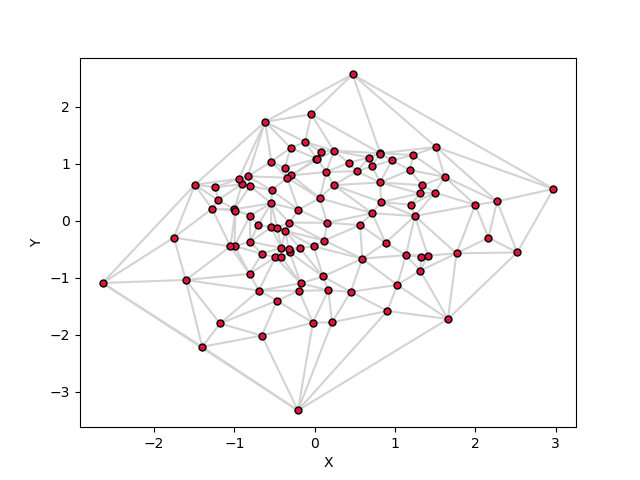

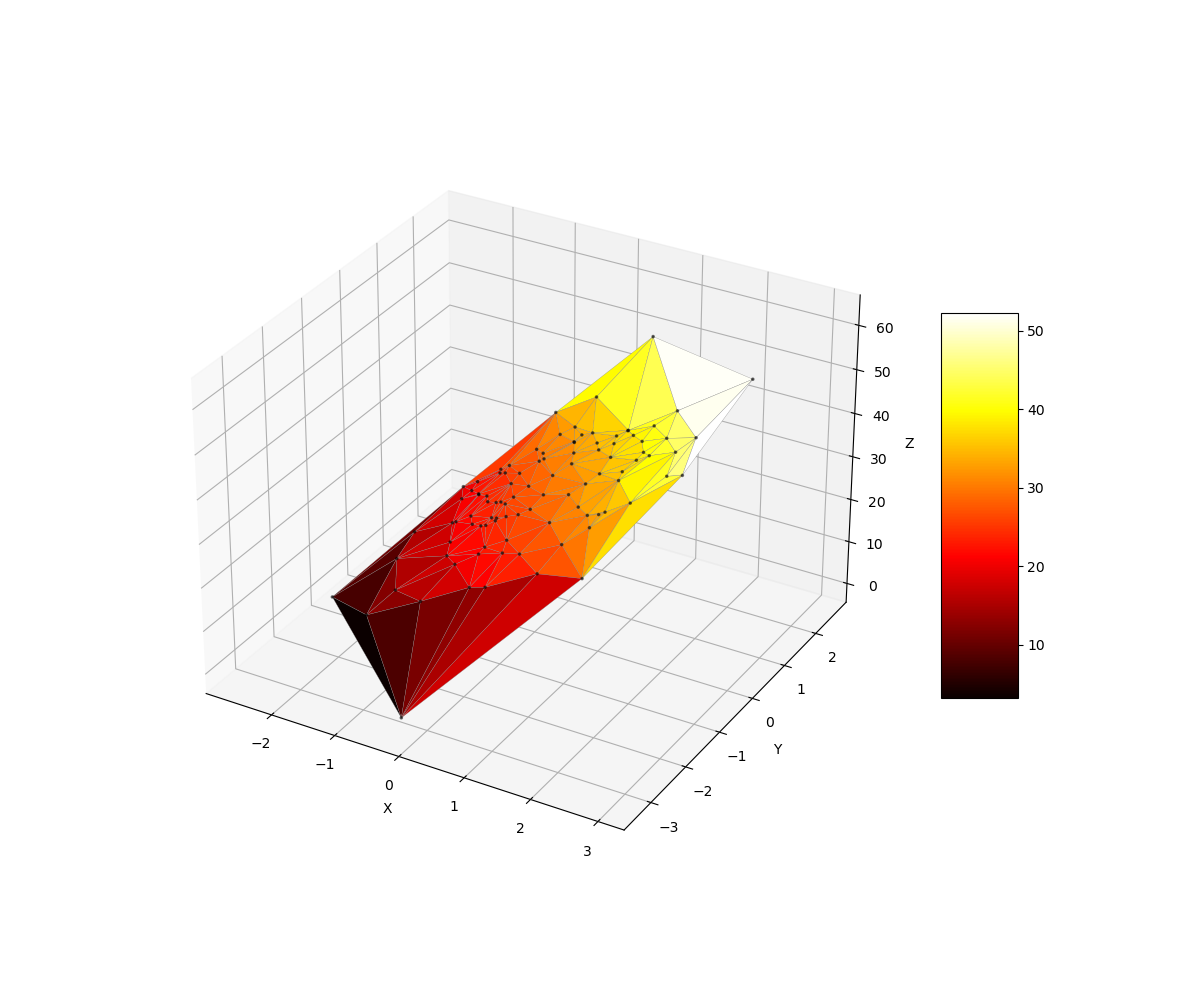

In [13]:
plot_int_bivariatefFunction_trisurf(b,rho_samples)